### Example #1

Author : Minjun J. Choi (mjchoi@nfri.re.kr)

We will calculate cross power, coherence, and cross phase between two data sets.

#### Step #0
Import modules.

In [1]:
%matplotlib inline 
import sys, os
sys.path.append(os.pardir)
from fluctana import *

#### Step #1 
Make two data sets to be compared.

One data set has three channel ('ECEI_G1602', 'ECEI_G1603', 'ECEI_G1604').

The other has three channels ('ECEI_G1702', 'ECEI_G1703', 'ECEI_G1704').

In [2]:
A = FluctAna()
A.add_data(KstarEcei(shot=16150, clist=['ECEI_G1602-1604']), trange=[7.57, 7.62])
A.add_data(KstarEcei(shot=16150, clist=['ECEI_G1702-1704']), trange=[7.57, 7.62])

ECEI file = /eceidata2/exp_2016/016150/ECEI.016150.GFS.h5
data is normalized by trange average
ECEI file = /eceidata2/exp_2016/016150/ECEI.016150.GFS.h5
data is normalized by trange average


#### Step #2
Do fft transform with proper option parameters

In [3]:
A.fftbins(nfft=512,window='hann',overlap=0.5,detrend=1)

---- DATA SET # 0 for [7.57, 7.62] s ----
{000:ECEI_G1602} {001:ECEI_G1603} {002:ECEI_G1604} 

---- DATA SET # 1 for [7.57, 7.62] s ----
{000:ECEI_G1702} {001:ECEI_G1703} {002:ECEI_G1704} 

dnum 0 fftbins 193 with hann size 512 overlap 0.5 detrend 1
dnum 1 fftbins 193 with hann size 512 overlap 0.5 detrend 1


The message means that

data set number 0 has three channel and each data is divided into 193 sections (or bins) with overlap ratio = 0.5. Each section (bin) has 512 data points.

data set number 1 has three channels and each data is divided into 193 sections (or bins) with overlap ratio = 0.5. Each section (bin) has 512 data points.

#### Step #3
Calculate cross power between two data sets.

Set the reference data set (done) as data set number 0. If the reference data set has only one channel, calculations will be done between the one reference channel and all channels in dtwo. Otherwise, done can have same number of channels with dtwo, and calculations between pairs of same channel numbers will be done.

Set dtwo as data set number 1

In [4]:
A.cross_power(done=0,dtwo=1)

#### Step #4
Plot the result. 

The result is saved for data set number 1 (dtwo)

Plot the result of the channel number 0, 1, 2 (in dtwo=1) in multiple windows

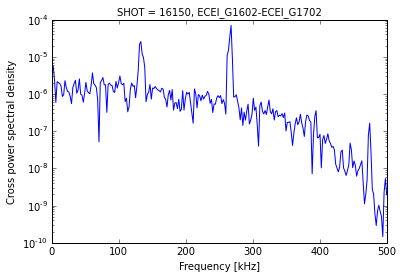

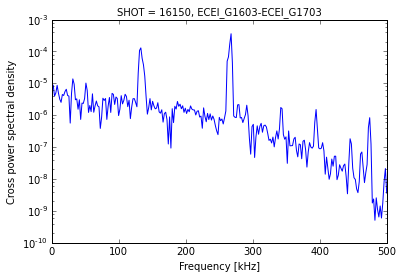

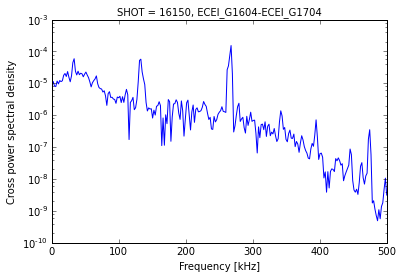

In [5]:
A.mplot(dnum=1,cnum=[0,1,2],type='val')

Plot the result of the channel number 0, 1, 2 (in dtwo=1) in single window (overlapping)

dnum 1 : calculation ECEI_G1602-ECEI_G1702 is plotted
dnum 1 : calculation ECEI_G1603-ECEI_G1703 is plotted
dnum 1 : calculation ECEI_G1604-ECEI_G1704 is plotted


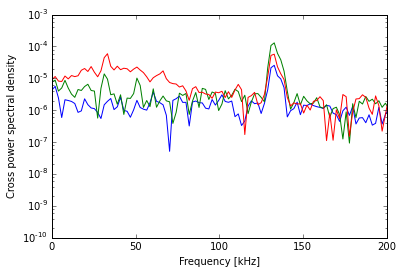

In [6]:
A.oplot(dnum=1,cnum=[0,1,2],type='val',xlimits=[0,200])

Plot the rms amplitude image (3 points in this example) by adding up the cross power over a frequency range

snum : sample channel number

frange : integration frequency range

vlimits : color scale limits

/home/users/ymjeon.ikstar/anaconda2/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


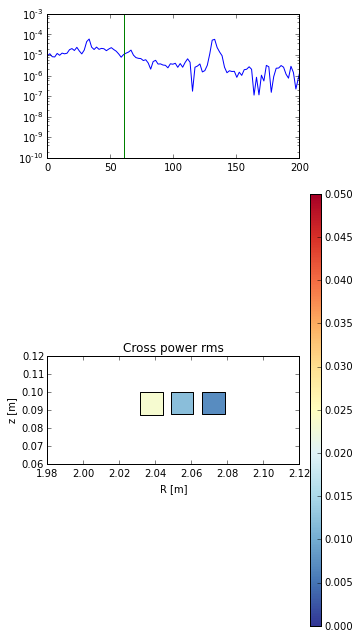

In [7]:
A.cplot(dnum=1,snum=2,frange=[0,60],vlimits=[0,0.05],xlimits=[0,200])

You can calculate and plot coherence similarily.

In [8]:
A.coherence(done=0,dtwo=1)

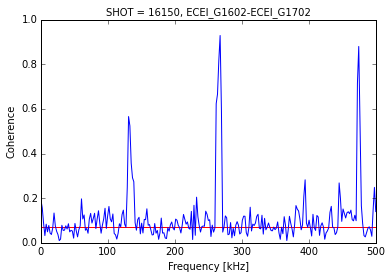

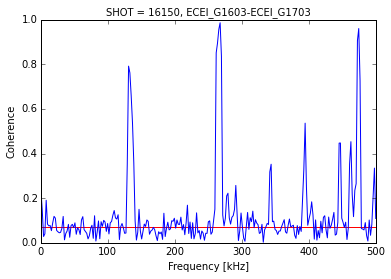

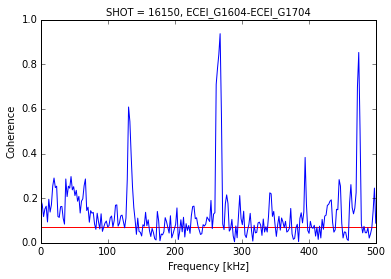

In [9]:
A.mplot(dnum=1,cnum=[0,1,2],type='val',ylimits=[0,1])

dnum 1 : calculation ECEI_G1602-ECEI_G1702 is plotted
dnum 1 : calculation ECEI_G1603-ECEI_G1703 is plotted
dnum 1 : calculation ECEI_G1604-ECEI_G1704 is plotted


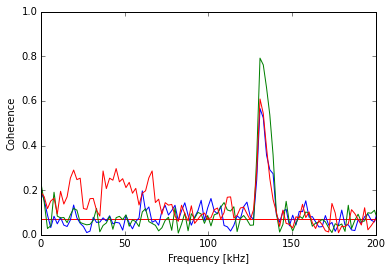

In [10]:
A.oplot(dnum=1,cnum=[0,1,2],type='val',ylimits=[0,1],xlimits=[0,200])

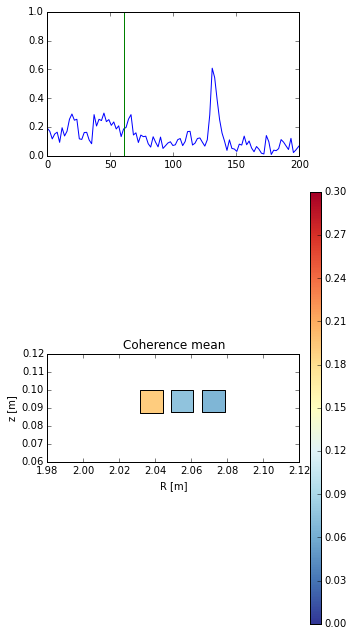

In [11]:
A.cplot(dnum=1,snum=2,frange=[0,60],vlimits=[0,0.3],xlimits=[0,200])

You can calculate and plot cross phase similarily.

In [12]:
A.cross_phase(done=0,dtwo=1)

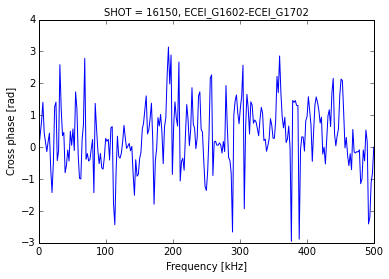

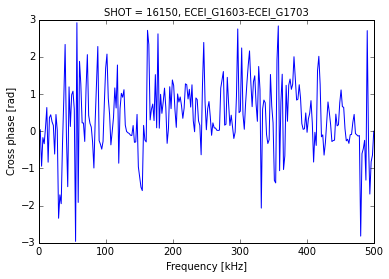

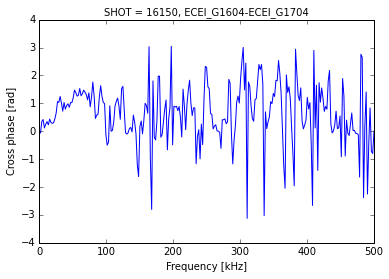

In [13]:
A.mplot(dnum=1,cnum=range(3),type='val')

dnum 1 : calculation ECEI_G1602-ECEI_G1702 is plotted
dnum 1 : calculation ECEI_G1603-ECEI_G1703 is plotted
dnum 1 : calculation ECEI_G1604-ECEI_G1704 is plotted


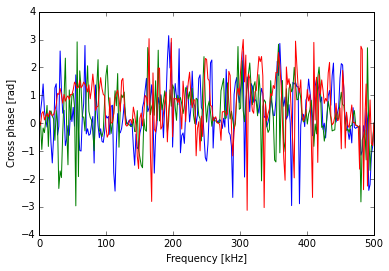

In [14]:
A.oplot(dnum=1,cnum=range(3),type='val')

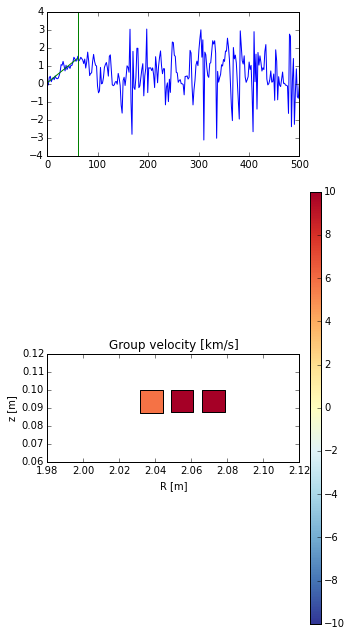

In [15]:
A.cplot(dnum=1,snum=2,frange=[0,60],vlimits=[-10,10])

cplot results are saved in 'pdata'. The group velocity calculation from the linear cross phase (as in the third pair (1604-1704; 5.787 km/s)) is only meaningful. 

In [16]:
A.Dlist[1].pdata

array([ 97.94263459,  29.36736446,   5.78669785])